# 머신러닝 4차세션 예습과제

- 9/12 화요일 23:59 (4차세션 전날)까지 제출
- 제출 파일명 : 비타민_12기_4주차_예습과제_본인이름.ipynb  로 제출
- ipynb 파일로 제출
- 지각 제출은 허용하지 않음

# 실습 1

## 보팅 (25점)

이번 예습과제에 사용할 데이터는 사이킷런 내장 데이터인 wine 데이터입니다.

### 1-1. 다음 (a), (b), (c), (d)에 들어갈 용어를 쓰시오. (4점, 각 1점)

1. 보팅의 유형으로는 (a) 와 (b)가 있다.
2. (a) 은 예측한 결괏값들 중 (c)의 분류기가 결정한 예측값을 최종 결괏값으로 선정한다.
3. (b) 은 분류기들의 레이블 값 결정 (d)(를/을) 모두 더하고 이를 평균해서 이들 중 (d)(이/가) 가장 높은 레이블 값을 최종 결괏값으로 선정한다.

In [1]:
# 답안 :
'''
a : 하드 보팅 (hard voting)
b : 소프트 보팅 (soft voting)
c : 과반수
d : 확률
'''

'\na : 하드 보팅 (hard voting)\nb : 소프트 보팅 (soft voting)\nc : 과반수\nd : 확률\n'

### 1-2. wine data로 보팅 방식의 앙상블을 구현하시오. '구현' 부분을 채우시면 됩니다 (21점)

아래 코드를 실행하시오

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn. model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = load_wine()
wine = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 1-2 (1) 로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 보팅 분류기를 생성하시오. (단, KNN의 군집의 개수는 8로 하시오.) (4점)

In [3]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

### 1-2 (2) 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기를 생성하고, 데이터 셋을 훈련세트와 테스트 세트로 분류하시오. (4점)

In [4]:
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(dataset.data,dataset.target,test_size = 0.2, random_state = 156)

### 1-2 (3) VotingClassifier를 학습/예측/평가하시오.(fit, predict, 정확도 사용) (6점)

In [5]:
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('정확도:{:.4f}'.format(accuracy))

정확도:0.9722


### 1-2 (4) 개별 모델에 대해 학습/예측/평가를 하시오.(for문 이용할 것) (7점)

In [6]:
clf_names = ['lr_clf', 'knn_clf']
classifiers = [lr_clf, knn_clf]
for idx in range(len(classifiers)):
    clf = classifiers[idx]
    clf_name = clf_names[idx]
    clf.fit(X_train,y_train)
    print('{}분류기의 정확도: {:.4f}'.format(clf_name,
                                      accuracy_score(y_test,clf.predict(X_test))))

lr_clf분류기의 정확도: 1.0000
knn_clf분류기의 정확도: 0.6111


## 실습2

### 배깅(랜덤 포레스트) (25점)

In [7]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [8]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_wine()
labels = dataset.target
wine = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
wine['target'] = labels
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [9]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
feature = wine.drop(columns = 'target', axis = 1)
y = wine.target

In [11]:
y.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=10)

### 2-1 빈칸에 들어갈 말은 무엇일까요? (3점)
랜덤 포레스트는 여러 개의 데이터 세트를 중첩되게 분리하는 _____  분할 방식을 사용한다.

In [13]:
# 답 : bootstrapping

### 2-2 wine 데이터를 RandomForestClassifier에 적합시키고 성능을 측정하세요. (7점)
    - fit, predict, accuracy_score 이용  
    - random_state=0, max_depth=3 으로 설정

In [14]:
rf_clf = RandomForestClassifier(random_state=0,max_depth=3)
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("accuracy:{:.4f}".format(accuracy_score(y_test,rf_pred)))

accuracy:0.8889


### 2-3 예측값과 실제값을 이용하여 오차행렬을 출력하세요. (3점)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_pred)
cm

array([[10,  0,  0],
       [ 1, 14,  3],
       [ 0,  0,  8]], dtype=int64)

### 2-4 GridSearchCV를 이용하여 최적하이퍼파라미터를 찾고 출력해보세요. (7점)
    - 폴드 개수는 3으로 설정

In [16]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100,150,200],
    'criterion':['gini','log_loss'],
    'max_features':[None,'sqrt'],
    'max_depth':[3,5,7,9]
}
gscv = GridSearchCV(estimator=rf_clf,param_grid=params, cv=3,refit=True,scoring='accuracy')
gscv.fit(X_train,y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 150}
0.978871158392435


### 2-5 최적하이퍼파라미터로 RandomForestClassifier를 다시 학습시키고 성능을 측정하세요. (5점)

In [17]:
best_rf = gscv.best_estimator_
best_pred=best_rf.predict(X_test)
accuracy_score(y_test,best_pred)

0.9166666666666666

In [18]:
new_rf_clf = RandomForestClassifier(criterion='gini',max_depth=3,max_features='sqrt',n_estimators=150)
new_rf_clf.fit(X_train,y_train)
new_pred = new_rf_clf.predict(X_test)
print('accuracy:{:.4f}'.format(accuracy_score(y_test,new_pred)))

accuracy:0.9444


# 실습3

# XGBoost (25점)

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_wine()
labels = dataset.target
wine = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
wine['target'] = labels
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


## Columns 설명
- 알콜(Alcohol)
- 말산(Malic acid)
- 회분(Ash)
- 회분의 알칼리도(Alcalinity of ash)
- 마그네슘(Magnesium)
- 총 폴리페놀(Total phenols)
- 플라보노이드 폴리페놀(Flavanoids)
- 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
- 프로안토시아닌(Proanthocyanins)
- 색상의 강도(Color intensity)
- 색상(Hue)
- 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
- 프롤린(Proline)
- 와인 종류(target)

In [2]:
feature = wine.drop(columns = 'target', axis = 1)
y = wine.target

### 3-1 wine 데이터를 xgbclassifier에 적합시키고 accuracy_score를 이용해 점수를 내세요 (6점)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=1)
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.5, max_depth = 3)

In [4]:
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print('{:.4f}'.format(accuracy_score(y_test,xgb_pred)))

0.9630


### 3-2 gridsearch를 이용해서 자유롭게 파라미터 설정하면서 점수를 높여보세요 (6점)
- 다음은 XGBClassifier의 주요 파라미터입니다. 되도록 0.97이상 점수가 나오게 설정해주세요
|주요파라미터|범위|설명|
|---|---|---|
|max_depth|0 ~ ∞|트리의 최대깊이 / 수가 커지면 복잡해지고 과적합 가능성▲|
|learning_rate|0 ~ 1|학습률 / 커지면 업데이트 속도▲|
|subsample|0 ~ 1|학습 시 데이터 샘플링 비율 지정 / 일반적으로 0.5 ~ 1 사이의 값을 가짐|

In [5]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [-1,1,2],
          'learning_rate' : [0.15,0.1,0.05],
          'subsample' : [1,0.7,0.5]}

grid_xgb = GridSearchCV(xgb, param_grid = params, cv = 3, refit = True)
grid_xgb.fit(X_train, y_train)

print('GridSearchCV 최적의 파라미터:', grid_xgb.best_params_)
print('GridSearchCV 최적의 정확도:{0:.4f}'.format(grid_xgb.best_score_))

GridSearchCV 최적의 파라미터: {'learning_rate': 0.1, 'max_depth': 1, 'subsample': 0.5}
GridSearchCV 최적의 정확도:0.9758


### 3-3 early_stopping_rounds 설정 (7점)
- XGBClassifier는 조기 중단을 할 수 있습니다. early_stopping_rounds 파라미터를 임의로 설정해 조기 중단해주세요.

- early_stopping_rounds는 validation_1-mlogloss의 값이 최소값일 때 추가로 n번을 더 실시하고 그럼에도 불구하고 점수가 오르지 않으면 학습이 조기 종료되는 특징을 가지고 있습니다. 설정한 n값만큼 반복했는지 확인해주세요.

In [7]:
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.5, max_depth = 10)
evals = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train,y_train,early_stopping_rounds=50,eval_set=evals,eval_metric='mlogloss',verbose=True)

[0]	validation_0-mlogloss:0.55745	validation_1-mlogloss:0.59482
[1]	validation_0-mlogloss:0.32698	validation_1-mlogloss:0.37759
[2]	validation_0-mlogloss:0.20214	validation_1-mlogloss:0.25890
[3]	validation_0-mlogloss:0.13034	validation_1-mlogloss:0.19014
[4]	validation_0-mlogloss:0.08766	validation_1-mlogloss:0.14454
[5]	validation_0-mlogloss:0.06113	validation_1-mlogloss:0.11933
[6]	validation_0-mlogloss:0.04530	validation_1-mlogloss:0.10537
[7]	validation_0-mlogloss:0.03470	validation_1-mlogloss:0.09035
[8]	validation_0-mlogloss:0.02709	validation_1-mlogloss:0.08565
[9]	validation_0-mlogloss:0.02236	validation_1-mlogloss:0.08144
[10]	validation_0-mlogloss:0.01912	validation_1-mlogloss:0.08140
[11]	validation_0-mlogloss:0.01645	validation_1-mlogloss:0.07857
[12]	validation_0-mlogloss:0.01457	validation_1-mlogloss:0.07699
[13]	validation_0-mlogloss:0.01320	validation_1-mlogloss:0.07501
[14]	validation_0-mlogloss:0.01283	validation_1-mlogloss:0.07516
[15]	validation_0-mlogloss:0.01253	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### 3-4 plot_importance 시각화 (6점)
- plot_importance()를 이용하여 feature의 중요도를 시각화해주세요

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

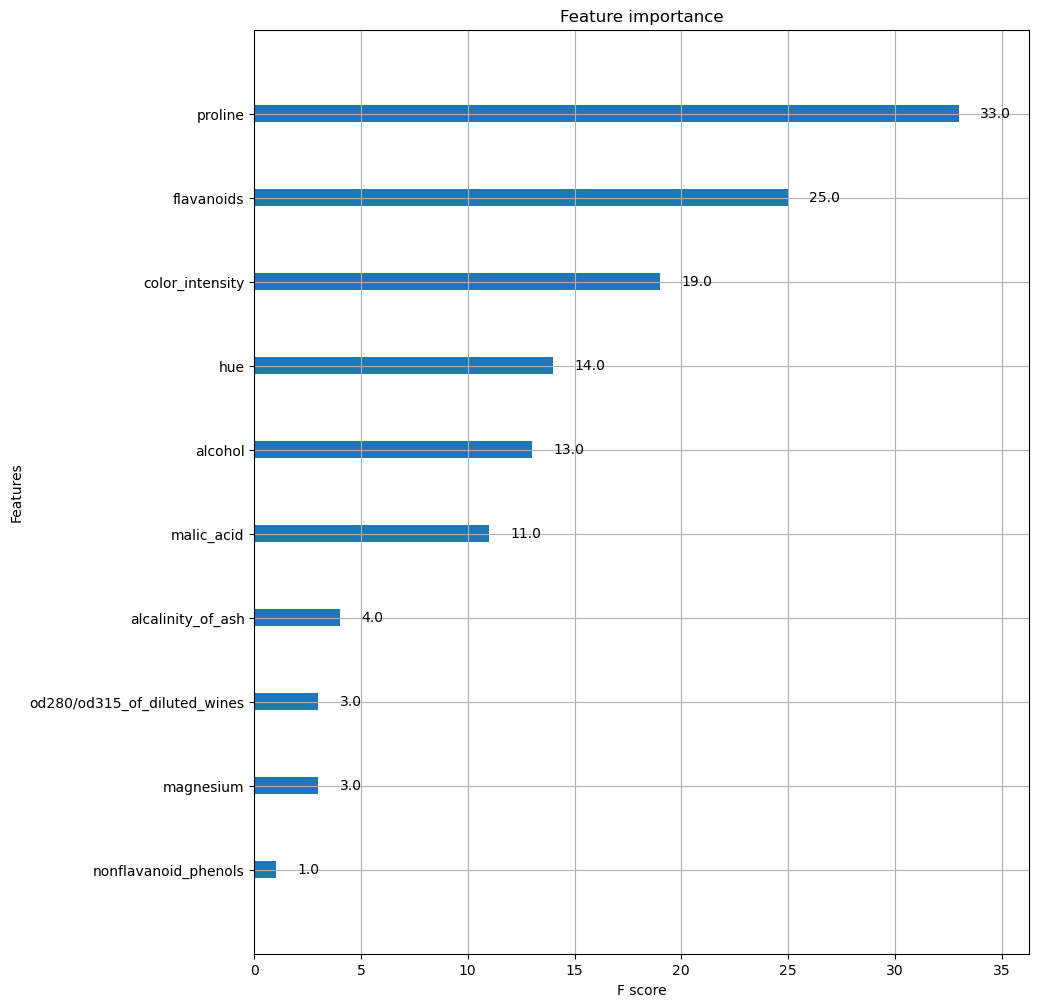

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb,ax=ax)

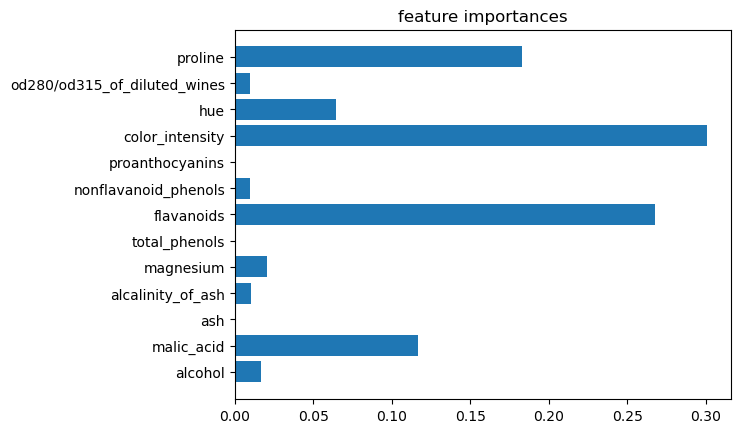

In [21]:
plt.barh(wine.columns[:-1],xgb.feature_importances_)
plt.title('feature importances')
plt.show()

## 실습4

## LightGBM(25점)

In [69]:
# LGBMClassifier
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

wine = load_wine()
wine_data = wine.data
wine_target = wine.target
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
df_wine['target'] = wine.target

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [70]:
df_wine.columns = df_wine.columns.get_level_values(0)
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

### 4-1 `train_test_split` 을 사용하여 80%는 학습용 데이터로 20%는 테스트용 데이터로 분리하세요. (random_state = 12) (2점)


In [71]:
X_train,X_test,y_train,y_test = train_test_split(df_wine.iloc[:,:-1],df_wine.iloc[:,-1],test_size=0.2,random_state=12)

### 4-2 `X_train`, `y_train` 을 90%는 학습용 데이터로, 10%는 검증용 데이터로 분리하세요. (random_state = 12) (5점)

In [72]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=12)

### 4-3 LGBM classifier 객체를 생성하세요. (n_estimators = 400) (5점)

In [54]:
lgbm = LGBMClassifier(n_estimators=400)

### 4-4 학습을 진행하세요. (단, `early_stopping_round` 를 이용하여 55회에 조기 중단 시키세요.) (5점)

In [57]:
evals = [(X_tr,y_tr),(X_val,y_val)]
lgbm.fit(X_tr,y_tr,eval_set=evals,eval_metric='logloss',early_stopping_rounds=55,verbose=True)

[1]	training's multi_logloss: 0.933281	valid_1's multi_logloss: 0.924054
[2]	training's multi_logloss: 0.817083	valid_1's multi_logloss: 0.799134
[3]	training's multi_logloss: 0.723254	valid_1's multi_logloss: 0.706118
[4]	training's multi_logloss: 0.641514	valid_1's multi_logloss: 0.617135
[5]	training's multi_logloss: 0.572321	valid_1's multi_logloss: 0.546482
[6]	training's multi_logloss: 0.513609	valid_1's multi_logloss: 0.490752
[7]	training's multi_logloss: 0.462358	valid_1's multi_logloss: 0.435932
[8]	training's multi_logloss: 0.415391	valid_1's multi_logloss: 0.382491
[9]	training's multi_logloss: 0.373809	valid_1's multi_logloss: 0.342602
[10]	training's multi_logloss: 0.33787	valid_1's multi_logloss: 0.307254
[11]	training's multi_logloss: 0.305925	valid_1's multi_logloss: 0.272683
[12]	training's multi_logloss: 0.275342	valid_1's multi_logloss: 0.242171
[13]	training's multi_logloss: 0.250417	valid_1's multi_logloss: 0.217605
[14]	training's multi_logloss: 0.228281	valid_1'

LGBMClassifier(n_estimators=400)

### 4-5 `plot_importance()` 를 이용하여 feature 중요도를 시각화하세요. (8점)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

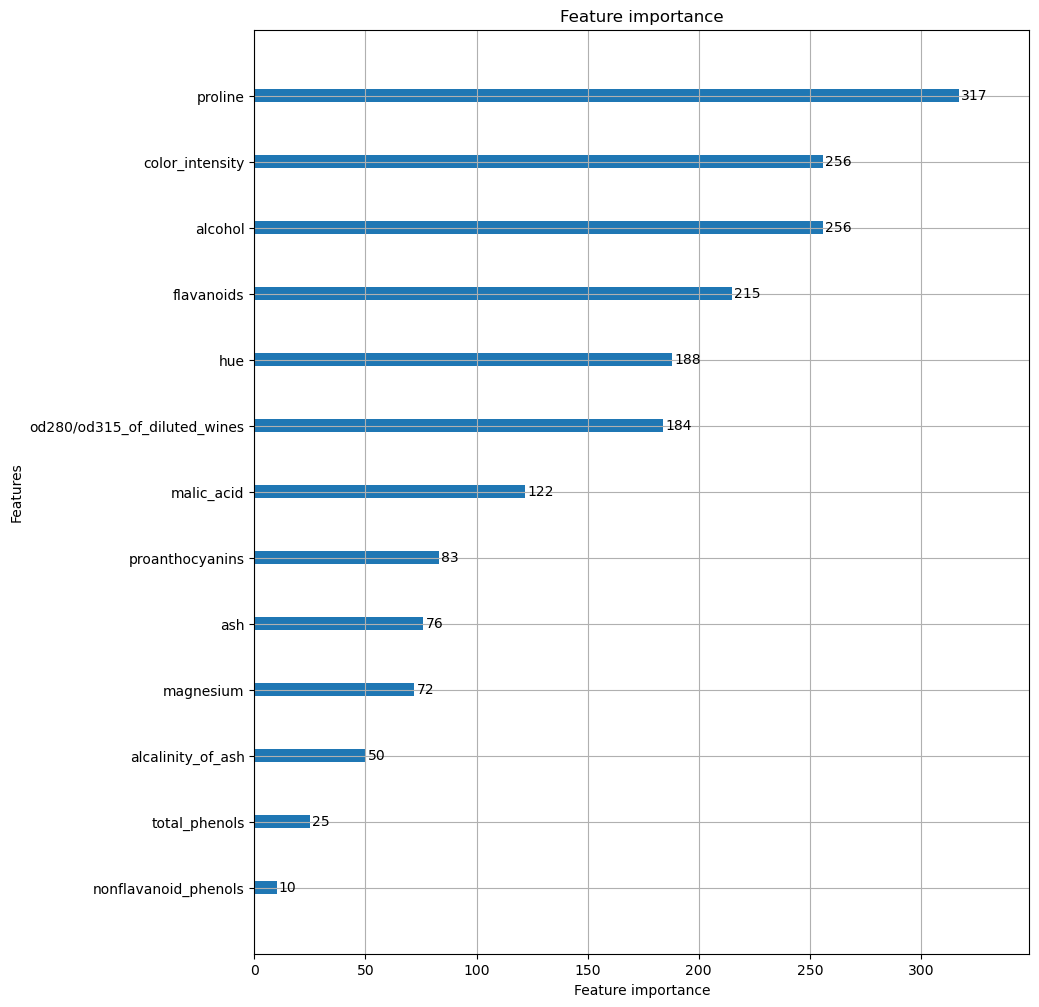

In [58]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax)

# 실습5

### 앙상블 학습

보팅(Voting) 방식: 같은 데이터셋에 대해 서로 다른 여러 개의 분류기의 예측값을 결합하여 최종 예측값을 결정하는 앙상블 방법

다음은 보팅 분류기를 이용한 앙상블 학습에 필요한 라이브러리 및 데이터셋입니다.


*   VotingClassifier: 보팅 방식의 앙상블을 구현한 클래스
*   LogisticRegrssion: 로지스틱 회귀 클래스
*   KNeighborsClassifier: K Nearest Neighbor(KNN) 분류 알고리즘 클래스
*   load_breast_cancer: 종양의 크기와 모양에 관한 속성들과 종양의 악성 여부를 레이블로 하는 데이터셋, 위스콘신 유방암 데이터 세트
*   train_test_split: 데이터 분할
*   accuracy_score: 분류 모델의 정확도






다음 라이브러리 및 데이터를 로드해주세요.

In [59]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

Q. 다음 과정에 따라 보팅 분류기를 구현하고 정확도를 측정하세요.

In [68]:
# 로지스틱 회귀와 KNN 개별 분류기 객체를 생성하여 각각 변수에 저장
lgr = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 위에서 생성한 두 모델을 기반으로하는 소프트 보팅 객체를 생성
sv_clf = VotingClassifier(estimators=[('LG',lgr),('KNN',knn_clf)],voting='soft')

# 테스트 사이즈를 전체 데이터의 20%로 하여 train, test 데이터 셋을 분류
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)

# 보팅 분류기로 학습 후 테스트 데이터 예측 및 정확도 평가
# 정확도는 소수점 넷째자리까지 출력
sv_clf.fit(X_train,y_train)
sv_pred = sv_clf.predict(X_test)
print('정확도: {:.4f}'.format(accuracy_score(y_test,sv_pred)))

정확도: 0.9561


### 랜덤 포레스트

다음 코드를 실행해 주세요.

In [73]:
from sklearn.ensemble import RandomForestClassifier

Q. 보팅 분류기를 구현할 때 만든 X_train, X_test, y_train, y_test을 이용하여 랜덤포레스트를 구현하고 정확도를 측정하세요.

In [76]:
# 랜덤 포레스트 객체를 rf_clf 변수로 저장
# 이때 max_depth = 16, n_estimators = 50, random_state = 124로 지정
rf_clf = RandomForestClassifier(max_depth=16,n_estimators=50,random_state=124)

# rf_clf를 이용하여 랜덤 포레스트 학습 및 예측 성능을 평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)

# 정확도를 accuracy변수에 저장
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.9722222222222222

### GBM

다음 코드를 실행해 주세요.

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()

Q. GBM를 구현하고 GBM 모델의 정확도와 수행 시간을 출력하여 예측 성능을 나타내세요.

In [78]:
start_time = time.time()
gbm = GradientBoostingClassifier(random_state=124)
gbm.fit(X_train,y_train)
gbm_pred = gbm.predict(X_test)
print('예측 정확도:{:.5f}'.format(accuracy_score(y_test,gbm_pred)))
print('수행 시간:{:.5f}초'.format(time.time()-start_time))

예측 정확도:1.00000
수행 시간:0.62367초


### XGB

다음 코드를 실행해 주세요.

In [86]:
import xgboost as xgb

Q1. 보팅 분류기를 구현할 때 만든 X_train, y_train을 다시 90%는 학습용, 10%는 검증용 데이터로 분리하세요.(random_state = 156)

In [87]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=156)

Q2. Q1문제에서 분리한 데이터로 XGBoost만의 전용 데이터 객체인 학습, 검증, 테스트용 Dmatrix를 생성하세요.

In [89]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)

### LightGBM

현재 LightGBM의 버전과 책과의 버전이 달라 에러가 발생합니다.

아래의 코드를 실행해 lightGBM의 버전이 3.2.2가 아니라면

LightGBM의 버전을 3.3.2로 다운그레이드 하고 런타임을 재시작해주세요

In [90]:
import lightgbm

print(lightgbm.__version__)

3.3.2


In [35]:
pip install lightgbm==3.3.2

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 640.0 kB/s eta 0:00:02
     ----------- ---------------------------- 0.3/1.0 MB 3.1 MB/s eta 0:00:01
     -------------------------------------- - 1.0/1.0 MB 7.7 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.5
    Uninstalling lightgbm-3.3.5:
      Successfully uninstalled lightgbm-3.3.5
Note: you may need to restart the kernel to use updated packages.


다음 코드를 실행해 주세요.

In [91]:
from lightgbm import LGBMClassifier #import

Q1. lgbm_wrapper라는 변수에 LGBClassifier 객체를 할당해주세요 (이때 부스팅 반복수를 200, 학습률을 0.03으로 설정해주세요)

In [92]:
lgbm_wrapper = LGBMClassifier(n_estimators=200,learning_rate=0.03)

Q2. XGB의 Q1문제에서 분리한 데이터를 이용해 LightGBM을 학습시키고, 예측해 주세요 (early_stopping_rounds=50, eval_metric=logloss로 하고 반복수를 보이게 해주세요)

또한 왜 해당 반복수에서 작업 수행이 멈추었는지 설명해 주세요

In [93]:
evals = [(X_tr,y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50,eval_set=evals,eval_metric='logloss',verbose=True)
lgbm_pred = lgbm_wrapper.predict(X_test)
print('accuracy: {:.4f}'.format(accuracy_score(y_test,lgbm_pred)))
print('''
LGBM 분류기가 부스팅을 진행하며 손실함수를 계산하는데,
early_stopping_rounds(=n)를 설정하면 n번 동안 손실값(오차값)의 감소에 변화가 없을 시,
더 이상 모델을 최적화할 수 없다고 판단하여 학습을 멈추고 결과를 반환함으로써 
학습 수행 시간을 단축한다.
''')

[1]	training's multi_logloss: 1.03893	valid_1's multi_logloss: 1.00053
[2]	training's multi_logloss: 0.997323	valid_1's multi_logloss: 0.963377
[3]	training's multi_logloss: 0.958127	valid_1's multi_logloss: 0.931752
[4]	training's multi_logloss: 0.92021	valid_1's multi_logloss: 0.903336
[5]	training's multi_logloss: 0.884822	valid_1's multi_logloss: 0.872777
[6]	training's multi_logloss: 0.85134	valid_1's multi_logloss: 0.846335
[7]	training's multi_logloss: 0.819629	valid_1's multi_logloss: 0.816262
[8]	training's multi_logloss: 0.789263	valid_1's multi_logloss: 0.790378
[9]	training's multi_logloss: 0.760812	valid_1's multi_logloss: 0.764434
[10]	training's multi_logloss: 0.733623	valid_1's multi_logloss: 0.740277
[11]	training's multi_logloss: 0.707279	valid_1's multi_logloss: 0.714976
[12]	training's multi_logloss: 0.682227	valid_1's multi_logloss: 0.690006
[13]	training's multi_logloss: 0.658581	valid_1's multi_logloss: 0.670402
[14]	training's multi_logloss: 0.635812	valid_1's m

Q3. plot_importance()를 이용해 feature의 중요도를 시각화해주세요

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

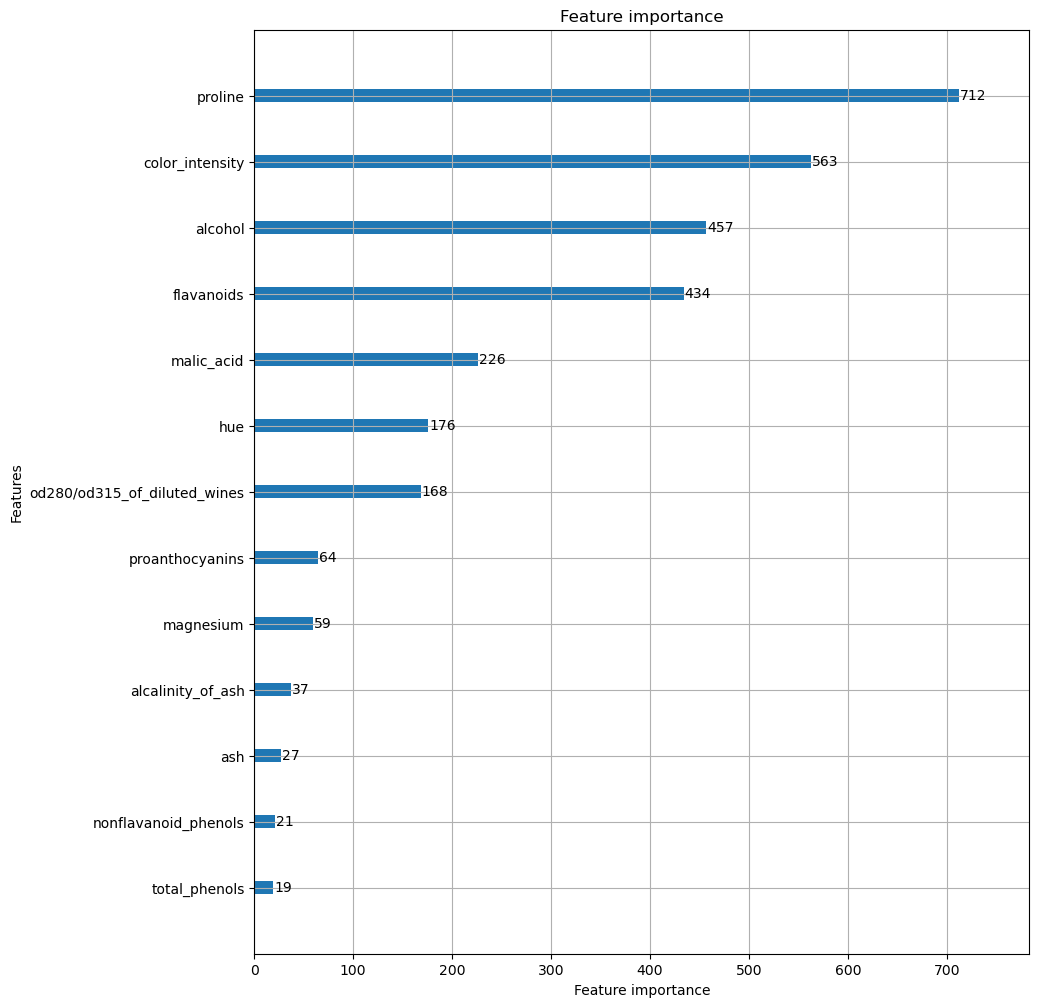

In [94]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax)